In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.optimizers import SGD


In [191]:
train = pd.read_csv("C://Users//Admin//Downloads//titanic//train.csv")
test=pd.read_csv("C://Users//Admin//Downloads//titanic//test.csv")
full= pd.concat([train, test], ignore_index=True, sort=False)

In [140]:
pid=test["PassengerId"]

In [141]:
full.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [142]:
full.drop(["PassengerId"], axis=1, inplace=True)

In [143]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


In [144]:
train.isna().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [145]:
lab= lambda x: "Known" if type(x)==str else "Unknown"
full["Cabin"]= full["Cabin"].apply(lab)

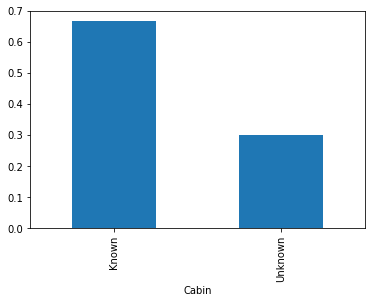

In [146]:
full.groupby("Cabin").mean()["Survived"].plot(kind="bar")

In [147]:
text=[]
for i in full["Name"]:
    text.append(i.split(',')[1].split('.')[0].strip())
full["Name"]=text

In [148]:
# try to check all the categories is how to see all of them
full["Name"]=full["Name"].replace(['Capt', 'Col','Don','Dr','Major','Rev','Jonkheer','Dona'],'Rare')

full["Name"]=full["Name"].replace(['the Countess', 'Lady', 'Sir'], 'Royal')
full["Name"]=full["Name"].replace('Mlle','Miss')
full["Name"]=full["Name"].replace('Mme','Mrs')
full['Name'] = full['Name'].replace('Ms', 'Miss')

In [149]:
full["Name"]

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Rare
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [150]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
Survived    891 non-null float64
Pclass      1309 non-null int64
Name        1309 non-null object
Sex         1309 non-null object
Age         1046 non-null float64
SibSp       1309 non-null int64
Parch       1309 non-null int64
Ticket      1309 non-null object
Fare        1308 non-null float64
Cabin       1309 non-null object
Embarked    1307 non-null object
dtypes: float64(3), int64(3), object(5)
memory usage: 112.6+ KB


In [151]:
full["Sex"] = LabelEncoder().fit_transform(full["Sex"])
full["Cabin"] = LabelEncoder().fit_transform(full["Cabin"])

full = pd.concat([full,pd.get_dummies(full["Name"])],axis=1)
full.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Rare,Royal
0,0.0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,1,S,0,0,1,0,0,0
1,1.0,1,Mrs,0,38.0,1,0,PC 17599,71.2833,0,C,0,0,0,1,0,0
2,1.0,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,1,S,0,1,0,0,0,0
3,1.0,1,Mrs,0,35.0,1,0,113803,53.1000,0,S,0,0,0,1,0,0
4,0.0,3,Mr,1,35.0,0,0,373450,8.0500,1,S,0,0,1,0,0,0
5,0.0,3,Mr,1,NaN,0,0,330877,8.4583,1,Q,0,0,1,0,0,0
6,0.0,1,Mr,1,54.0,0,0,17463,51.8625,0,S,0,0,1,0,0,0
7,0.0,3,Master,1,2.0,3,1,349909,21.0750,1,S,1,0,0,0,0,0
8,1.0,3,Mrs,0,27.0,0,2,347742,11.1333,1,S,0,0,0,1,0,0
9,1.0,2,Mrs,0,14.0,1,0,237736,30.0708,1,C,0,0,0,1,0,0


In [152]:
full.groupby("Name").mean()["Age"]

Name
Master     5.482642
Miss      21.824366
Mr        32.252151
Mrs       36.918129
Rare      45.400000
Royal     43.333333
Name: Age, dtype: float64

In [153]:
for i in full["Name"].unique():
    full.loc[(full["Age"].isnull()) & (full["Name"] == i),"Age"] = full.loc[(full["Age"].isnull()) & (full["Name"] == i),"Age"].replace(np.nan,full.groupby("Name").mean()["Age"][i])


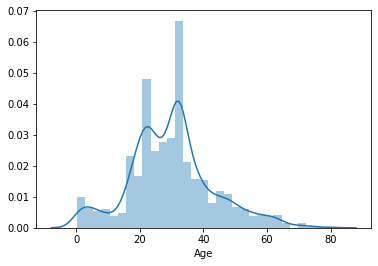

In [154]:
sns.distplot(full["Age"])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023A7ACA8288>,
      dtype=object)

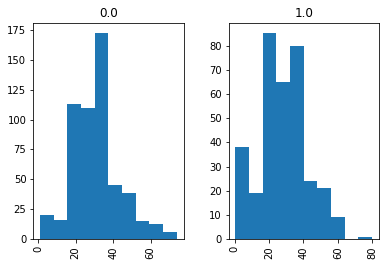

In [155]:
full.hist(by="Survived", column="Age")

In [156]:
# from above plot its visible that if we take people with age less that 18 more people have survived so we can make a feature which determine whether the person is less that 17 or not
lab= lambda n: 1 if n<17 else 0
full["18p"]=full["Age"].apply(lab)

In [157]:
full.isna().mean()

Survived    0.319328
Pclass      0.000000
Name        0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Ticket      0.000000
Fare        0.000764
Cabin       0.000000
Embarked    0.001528
Master      0.000000
Miss        0.000000
Mr          0.000000
Mrs         0.000000
Rare        0.000000
Royal       0.000000
18p         0.000000
dtype: float64

In [158]:
train=full[:891]
test=full[891:]

In [159]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Master,Miss,Mr,Mrs,Rare,Royal,18p
0,0.0,3,Mr,1,22.000000,1,0,A/5 21171,7.2500,1,S,0,0,1,0,0,0,0
1,1.0,1,Mrs,0,38.000000,1,0,PC 17599,71.2833,0,C,0,0,0,1,0,0,0
2,1.0,3,Miss,0,26.000000,0,0,STON/O2. 3101282,7.9250,1,S,0,1,0,0,0,0,0
3,1.0,1,Mrs,0,35.000000,1,0,113803,53.1000,0,S,0,0,0,1,0,0,0
4,0.0,3,Mr,1,35.000000,0,0,373450,8.0500,1,S,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,Rare,1,27.000000,0,0,211536,13.0000,1,S,0,0,0,0,1,0,0
887,1.0,1,Miss,0,19.000000,0,0,112053,30.0000,0,S,0,1,0,0,0,0,0
888,0.0,3,Miss,0,21.824366,1,2,W./C. 6607,23.4500,1,S,0,1,0,0,0,0,0
889,1.0,1,Mr,1,26.000000,0,0,111369,30.0000,0,C,0,0,1,0,0,0,0


In [161]:
features=["Age","Fare","Pclass","Sex","Cabin","Master","Miss","Mr","Mrs","Rare","Royal","18p"]

In [162]:
x=train[features]
y=train["Survived"]

In [163]:
x.head()

,Age,Fare,Pclass,Sex,Cabin,Master,Miss,Mr,Mrs,Rare,Royal,18p
0,22.0,7.2500,3,1,1,0,0,1,0,0,0,0
1,38.0,71.2833,1,0,0,0,0,0,1,0,0,0
2,26.0,7.9250,3,0,1,0,1,0,0,0,0,0
3,35.0,53.1000,1,0,0,0,0,0,1,0,0,0
4,35.0,8.0500,3,1,1,0,0,1,0,0,0,0


In [175]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [176]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_train)

In [185]:
seed_value= 0

import os
os.environ['PYTHONHASHSEED']=str(seed_value)

import random
random.seed(seed_value)

import numpy as np
np.random.seed(seed_value)

import tensorflow as tf
tf.random.set_seed(seed_value)

model = Sequential()
model.add(Dense(32,input_dim=12))
model.add(Activation("relu"))
# model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation("softmax"))

y_train=pd.get_dummies(y_train)

opt = SGD(learning_rate=0.3)

model.compile(optimizer= opt ,loss = "categorical_crossentropy" , metrics = ["accuracy"])
model.fit(x_train,y_train,epochs=80,batch_size=64,validation_split=0.1)

Epoch 1/80
10/10 [==============================] - 0s 14ms/step - loss: 0.5929 - accuracy: 0.6938 - val_loss: 0.3706 - val_accuracy: 0.8750
Epoch 2/80
10/10 [==============================] - 0s 3ms/step - loss: 0.5152 - accuracy: 0.7453 - val_loss: 0.3314 - val_accuracy: 0.8472
Epoch 3/80
10/10 [==============================] - 0s 4ms/step - loss: 0.5116 - accuracy: 0.7656 - val_loss: 0.3324 - val_accuracy: 0.8472
Epoch 4/80
10/10 [==============================] - 0s 5ms/step - loss: 0.4781 - accuracy: 0.7891 - val_loss: 0.3343 - val_accuracy: 0.8194
Epoch 5/80
10/10 [==============================] - 0s 5ms/step - loss: 0.4714 - accuracy: 0.7922 - val_loss: 0.3047 - val_accuracy: 0.8472
Epoch 6/80
10/10 [==============================] - 0s 5ms/step - loss: 0.4544 - accuracy: 0.8047 - val_loss: 0.2967 - val_accuracy: 0.8611
Epoch 7/80
10/10 [==============================] - 0s 5ms/step - loss: 0.4742 - accuracy: 0.7922 - val_loss: 0.2968 - val_accuracy: 0.8611
Epoch 8/80
10/10 [=

10/10 [==============================] - 0s 5ms/step - loss: 0.4075 - accuracy: 0.8188 - val_loss: 0.2961 - val_accuracy: 0.8889
Epoch 60/80
10/10 [==============================] - 0s 5ms/step - loss: 0.3920 - accuracy: 0.8266 - val_loss: 0.3021 - val_accuracy: 0.8750
Epoch 61/80
10/10 [==============================] - 0s 6ms/step - loss: 0.4020 - accuracy: 0.8266 - val_loss: 0.2692 - val_accuracy: 0.8889
Epoch 62/80
10/10 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8250 - val_loss: 0.2721 - val_accuracy: 0.8889
Epoch 63/80
10/10 [==============================] - 0s 5ms/step - loss: 0.3995 - accuracy: 0.8266 - val_loss: 0.2799 - val_accuracy: 0.8889
Epoch 64/80
10/10 [==============================] - 0s 4ms/step - loss: 0.3943 - accuracy: 0.8313 - val_loss: 0.2833 - val_accuracy: 0.8889
Epoch 65/80
10/10 [==============================] - 0s 5ms/step - loss: 0.3943 - accuracy: 0.8281 - val_loss: 0.2933 - val_accuracy: 0.8889
Epoch 66/80
10/10 [======

In [186]:
preds = model.predict(x_test)


In [187]:
from sklearn.ensemble import RandomForestClassifier
random_forest =RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
random_forest.score(x_train,y_train)

0.9845505617977528

In [188]:
submission = model.predict_classes(scaler.transform(test[features]))

In [189]:
output=pd.DataFrame({'PassengerId':pid,'Survived':submission})
output.to_csv('submission.csv',index=False)

In [317]:
corr=full.corr()
corr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Master,Miss,Mr,Mrs,Rare,Royal
Survived,1.000000,-0.338481,-0.543351,-0.087240,-0.035322,0.081629,0.257307,-0.316912,0.085221,0.335636,-0.549199,0.341994,-0.041703,0.073642
Pclass,-0.338481,1.000000,0.124617,-0.378017,0.060832,0.018322,-0.558629,0.713857,0.095257,0.025350,0.121492,-0.181733,-0.154721,-0.074101
Sex,-0.543351,0.124617,1.000000,0.083481,-0.109609,-0.213125,-0.185523,0.137396,0.164375,-0.676028,0.870678,-0.567801,0.082971,-0.031097
Age,-0.087240,-0.378017,0.083481,1.000000,-0.220564,-0.138476,0.170345,-0.272870,-0.409167,-0.307501,0.209371,0.224815,0.167351,0.048834
SibSp,-0.035322,0.060832,-0.109609,-0.220564,1.000000,0.373587,0.160238,0.009064,0.329171,0.075519,-0.243104,0.063941,-0.020876,0.007724
Parch,0.081629,0.018322,-0.213125,-0.138476,0.373587,1.000000,0.221539,-0.036806,0.253482,0.064589,-0.304780,0.216271,-0.038036,-0.021328
Fare,0.257307,-0.558629,-0.185523,0.170345,0.160238,0.221539,1.000000,-0.507253,0.011596,0.090110,-0.192246,0.141710,0.030910,0.025683
Cabin,-0.316912,0.713857,0.137396,-0.272870,0.009064,-0.036806,-0.507253,1.000000,0.041178,-0.002297,0.131807,-0.165224,-0.067363,-0.088858
Master,0.085221,0.095257,0.164375,-0.409167,0.329171,0.253482,0.011596,0.041178,1.000000,-0.111122,-0.258902,-0.093333,-0.031472,-0.010596
Miss,0.335636,0.025350,-0.676028,-0.307501,0.075519,0.064589,0.090110,-0.002297,-0.111122,1.000000,-0.588603,-0.212187,-0.071551,-0.024090


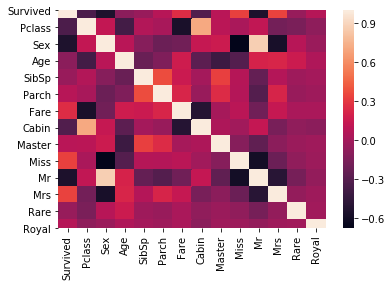

In [316]:
sns.heatmap(corr, annot=False)

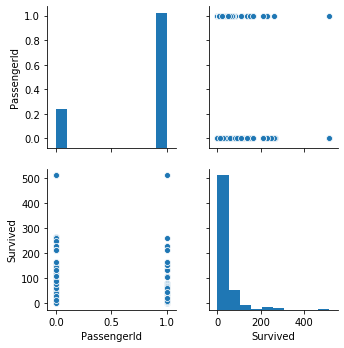